In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'path_to_csv.csv' with the path to your actual CSV file
df = pd.read_csv('../data/toxic/toxic_comments.csv')


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
# Check if all rows with a 1 in any category other than 'toxic' also have a 1 in 'toxic'
columns_to_check = ['severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Filter rows where any label column except 'toxic' has a 1 and 'toxic' is 0
mismatch_count = df[(df[columns_to_check] == 1).any(axis=1) & (df['toxic'] == 0)].shape[0]

print("Number of rows with label mismatch:", mismatch_count)


Number of rows with label mismatch: 931


In [5]:
label_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

for column in label_columns:
    print(df[column].value_counts())
    print("\n")


toxic
0    144277
1     15294
Name: count, dtype: int64


severe_toxic
0    157976
1      1595
Name: count, dtype: int64


obscene
0    151122
1      8449
Name: count, dtype: int64


threat
0    159093
1       478
Name: count, dtype: int64


insult
0    151694
1      7877
Name: count, dtype: int64


identity_hate
0    158166
1      1405
Name: count, dtype: int64




In [6]:
# Calculate average token length
average_token_length = df['comment_text'].str.len().mean()

# Calculate median token length
median_token_length = df['comment_text'].str.len().median()

# Calculate quantiles
quantiles = df['comment_text'].str.len().quantile([0.25, 0.5, 0.75, 0.95])

# Print results
print("Average token length:", average_token_length)
print("Median token length:", median_token_length)
print("Quantiles for token length:")
print("25th percentile (Q1):", quantiles[0.25])
print("Median (Q2):", quantiles[0.5])
print("75th percentile (Q3):", quantiles[0.75])
print("95th percentile:", quantiles[0.95])


Average token length: 394.0732213246768
Median token length: 205.0
Quantiles for token length:
25th percentile (Q1): 96.0
Median (Q2): 205.0
75th percentile (Q3): 435.0
95th percentile: 1355.0


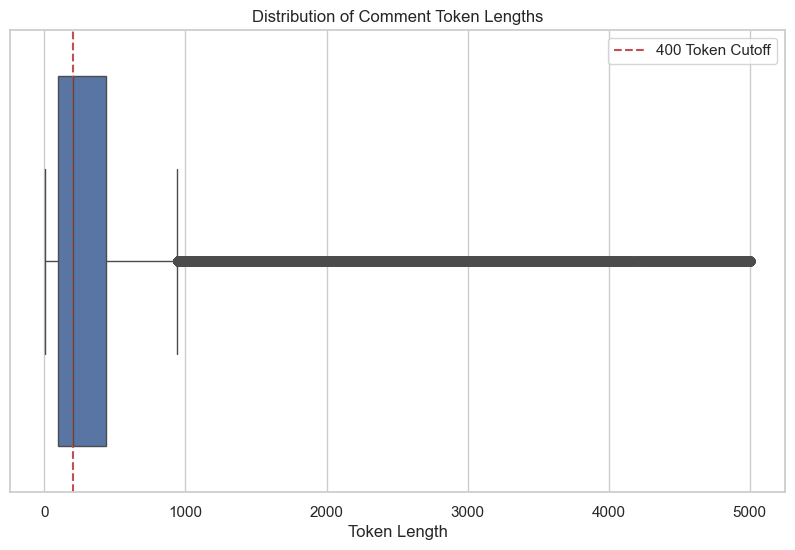

In [7]:
# Build boxplot about token distribution

# Calculate the token lengths
df['token_length'] = df['comment_text'].str.len()

# Set the style of the seaborn plot
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))  # Set the figure size
boxplot = sns.boxplot(x=df['token_length'])

boxplot.axvline(x=200, color='r', linestyle='--', label='400 Token Cutoff')  # Mark the cutoff point
plt.title('Distribution of Comment Token Lengths')  # Add a title
plt.xlabel('Token Length')  # Label the x-axis
plt.legend()  # Add legend to the plot

# Save plot as png
plt.savefig('token_length_distribution.png', dpi=300)

# Show the plot
plt.show()

In [8]:
defined_token_length = 200  # Define token cutoff

df = df[df['comment_text'].str.len() <= defined_token_length]


In [9]:
label_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

for column in label_columns:
    print(df[column].value_counts())
    print("\n")


toxic
0    68355
1    10150
Name: count, dtype: int64


severe_toxic
0    77336
1     1169
Name: count, dtype: int64


obscene
0    72653
1     5852
Name: count, dtype: int64


threat
0    78169
1      336
Name: count, dtype: int64


insult
0    73036
1     5469
Name: count, dtype: int64


identity_hate
0    77545
1      960
Name: count, dtype: int64




In [10]:
# Filter and rename columns
df = df[['comment_text', 'toxic']]
df.columns = ['text', 'label']

In [11]:
df.head()

,text,label
1,D'aww! He matches this background colour I'm s...,0
4,"You, sir, are my hero. Any chance you remember...",0
5,"""\n\nCongratulations from me as well, use the ...",0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,Your vandalism to the Matt Shirvington article...,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78505 entries, 1 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    78505 non-null  object
 1   label   78505 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [13]:
df['label'].value_counts()

label
0    68355
1    10150
Name: count, dtype: int64

In [14]:
# Shuffle before downsampling
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Target count for both classes
downsample_count = 10000  

# Function to downsample
downsampled_dfs = []
for label_value in df['label'].unique():  # Get unique values of the label column
    downsampled_dfs.append(df[df['label'] == label_value].head(downsample_count))

# Combine downsampled dfs and shuffle
df = pd.concat(downsampled_dfs)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


In [15]:
df['label'].value_counts()

label
1    10000
0    10000
Name: count, dtype: int64

In [16]:
df.head()

,text,label
0,fuck u \n\nIf you our gonna make a list make s...,1
1,live your life to the fungas max.,0
2,I smell like octopus poo and wee,0
3,"""\nSupport - Article is well written but too l...",0
4,", 9 April 2008 (UTC)\n*cuts a loud fart* 136.1...",1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20000 non-null  object
 1   label   20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [18]:
# Split the data
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Save as jsonl
def save_as_jsonl(dataframe, filename):
    records = dataframe.to_dict(orient='records')
    with open(filename, 'w') as f:
        for record in records:
            f.write(json.dumps(record) + '\n')

# Convert to JSON Lines and save
save_as_jsonl(train_df, '../data/toxic/train.jsonl')
save_as_jsonl(test_df, '../data/toxic/test.jsonl')
